# Séance 4

## Objectifs de la séance

- Analyse de la réponse à un saut de consigne :
- Extrapolation à partir de la réponse indicielle
- Tracé du signal

In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
# import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Réponse à une variation quelconque de consigne

Pour un système asservi à retour unitaire dont la fonction de transfert de boucle ouverte s’écrit :

$$
 G_{BO}(p)=\frac{6}{2p^2+3s+1}
$$

Nous voudrions connaître l’évolution de la sortie si la consigne passe de 10° à 30° :

### A partir de la réponse indicielle normée

:::{image} ../images/4_RepIndicielleNormee.png
:alt: RepIndicielle10-30
:width: 250px
:align: right
:::

Tracez tout d'abord la réponse indicielle et relevez-en les grandeurs caractéristiques:

- Régime établi = ...
- Dépassement relatif = ...
- $t_{r_{5\%}}$ = ...

- Régime établi = 0.8580265483248184 
- Dépassement relatif = 25.161365744447806 % 
- tr_5% = 4.077825465220377 s



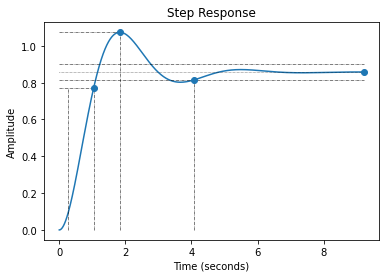

In [2]:
G_BO = ml.tf(6, [2, 3, 1])
G_BF = ml.feedback(G_BO, 1)
info = rlf.stepWithInfo(G_BF, NameOfFigure='Step with infos')

print("- Régime établi =", info.DCGain,
"\n- Dépassement relatif =", info.Overshoot, "%",
"\n- tr_5% =", info.SettlingTime, "s\n")

En déduire l’allure du signal de sortie si le signal d’entrée est celui donné à la figure suivante :

:::{image} ../images/4_RepIndicielle10-30.png
:alt: RepIndicielle10-30
:width: 250px
:align: right
:::

**Calculs:**
- de la valeur initiale:
- de la valeur finale:
- du dépassement absolu:
- du dépassement relatif:

::::{toggle}
- Valeur initiale = $10*\frac{6}{7} = 8.571$
- Valeur finale = $30*\frac{6}{7} = 25.714$
- Dépassement absolu = $8.571+(25.714-8.571)*(1+0.252) = 30.028$
- Dépassement relatif = $(\frac{30.028}{25.714}-1)*100 = 16.774\%$

:::{note}
Dépassement relatif de référence = 25.2% (cf. valeur calculée précédemment)
:::

::::

In [3]:
cons_init = 10
cons_fin = 30
val_init = cons_init*6/7
val_fin = cons_fin*6/7
d_abs = val_init+(val_fin-val_init)*(1+info.Overshoot/100)
d_rel = (d_abs/val_fin-1)*100
print("Val_init =", val_init)
print("Val_fin =", val_fin)
print("D_abs =", d_abs)
print("D_rel =", d_rel)

Val_init = 8.571428571428571
Val_fin = 25.714285714285715
D_abs = 30.0276626990482
D_rel = 16.774243829631885


### Via Python



D_abs = 30.04754144710496
T_dep = 1.8328577340232597 s



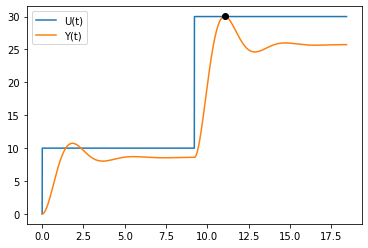

In [4]:
import warnings # Package permettant de gérer l'affichage de messages d'erreurs

G_BF = ml.feedback(ml.tf(6, [2, 3, 1]))
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, __, __ = rlf.stepFromTo(G_BF, 10, 30, focus=False)
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
print("D_abs =", peak)
print("T_dep =", peakTime, "s\n")

:::{admonition} Astuce
:class: tip
La fonction `stepFromTo` peut également limiter l'affichage à juste la partie intéressante du step et ainsi permettre d'utiliser la fonction `stepInfo` pour afficher toutes les infos que l'on souhaite obtenir.
:::

DCGain : 25.73194794895096
Overshoot : 16.771343960105977
Peak : 30.04754144710496
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923704
SettlingTime : 4.076496648636657



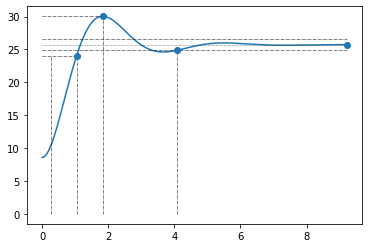

In [5]:
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 10, 30, focus=True)
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("")

Comparez avec un saut de consigne de 0° à 30° et de 29° à 30°

DCGain : 25.73194794895096
Overshoot : 16.771343960105977
Peak : 30.04754144710496
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923704
SettlingTime : 4.076496648636657

DCGain : 25.740792643479445
Overshoot : 25.161344614625737
Peak : 32.21752218704154
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923704
SettlingTime : 4.076496648636657



DCGain : 25.715143029346976
Overshoot : 0.8144423371035048
Peak : 25.9245780412247
PeakTime : 1.8328577340232597
RiseTime : 0.7847209996923705
SettlingTime : 4.078338716711053



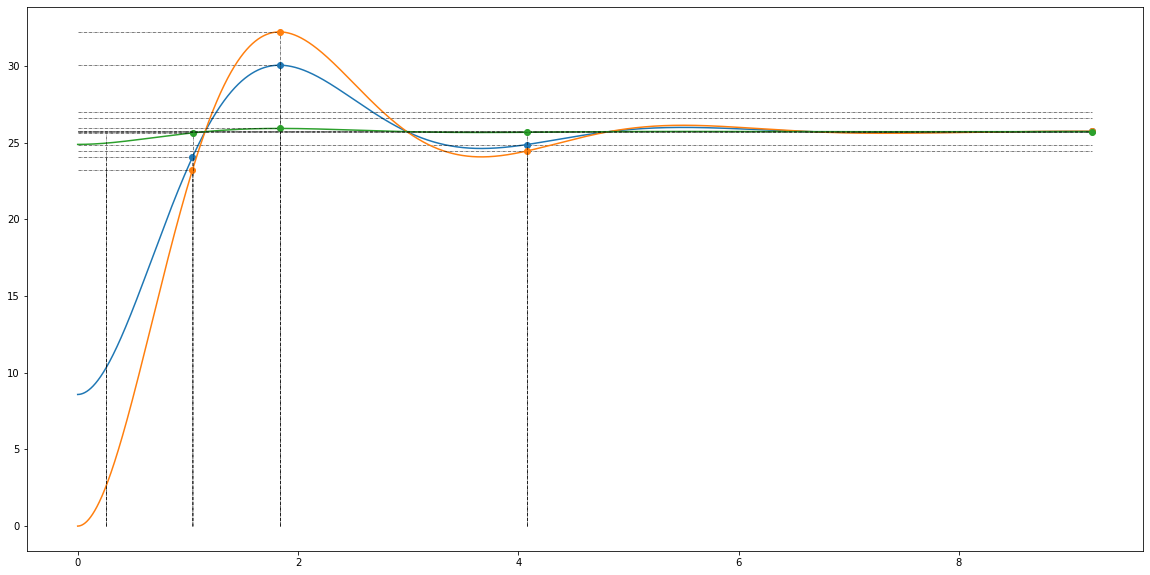

In [6]:
# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps comparaison",figsize=(20,10))
ax = fig.subplots()

# Saut de 10° à 30°
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 10, 30, focus=True, NameOfFigure="Steps comparaison")
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("")

# Saut de 0° à 30°
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 0, 30, focus=True, NameOfFigure="Steps comparaison")
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("")

# Saut de 29° à 30°
warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF, 29, 30, focus=True, NameOfFigure="Steps comparaison")
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
rlf.printInfo(info)
print("")